In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Task 2 - Exploratory Data Analysis (EDA)

# Overview of the Data

In [5]:
data = pd.read_csv('./data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# 2. Summary Statistics

In [7]:
# Summary statistics for numerical features
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# Distribution of Numerical Features

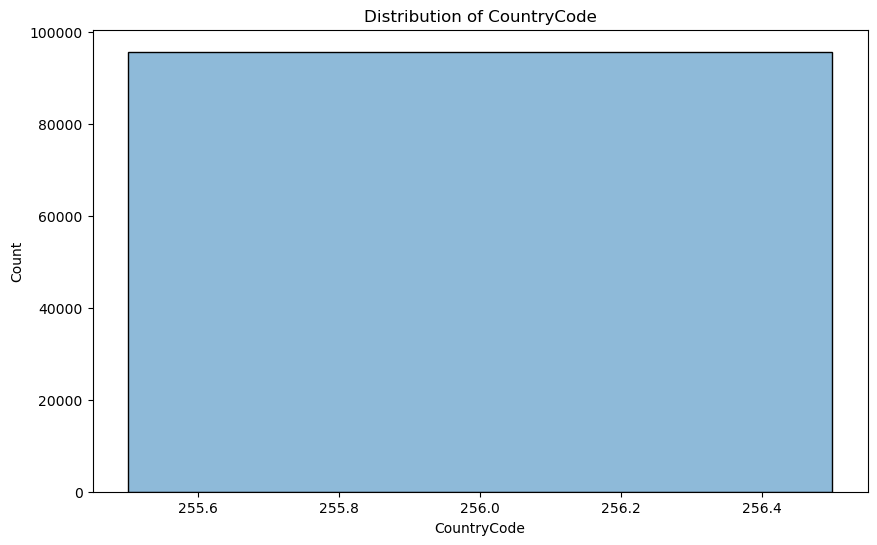

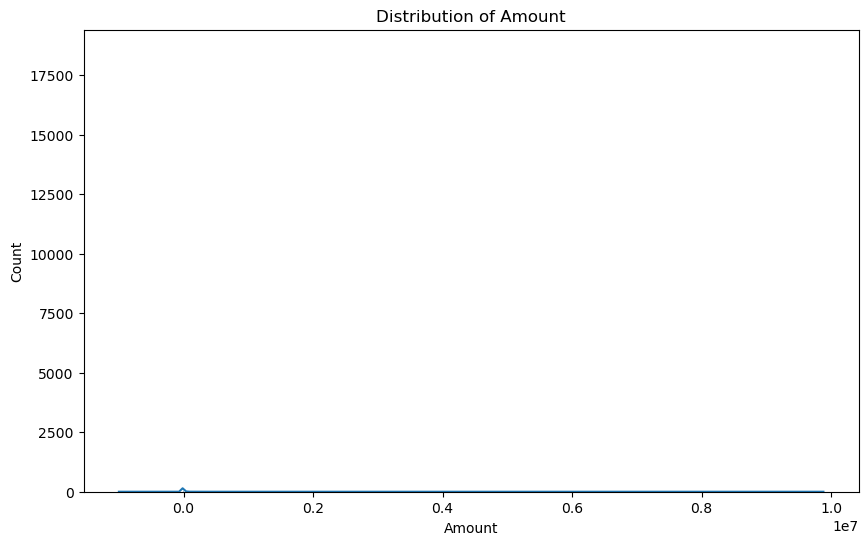

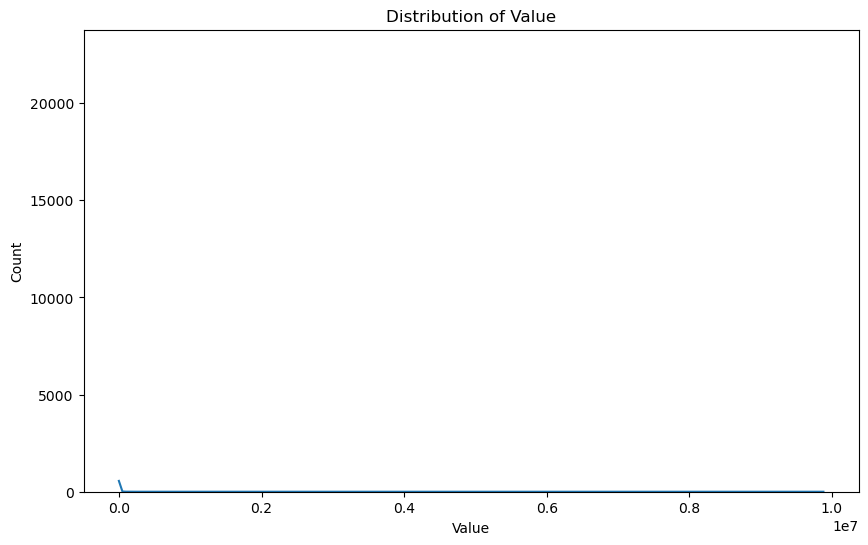

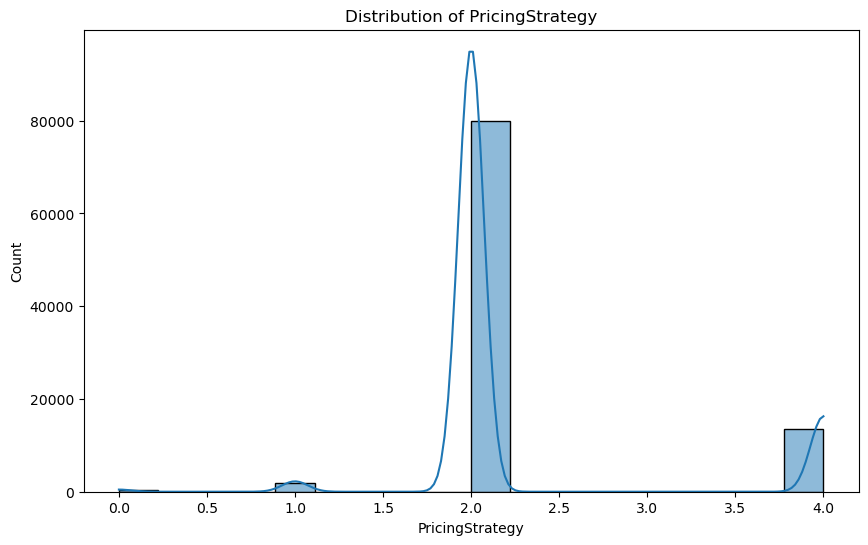

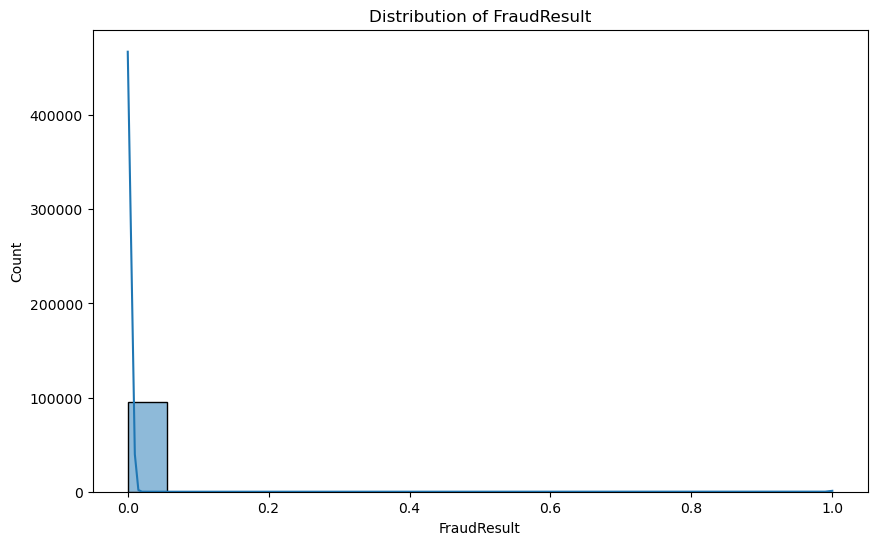

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot distributions
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



# Distribution of Categorical Features

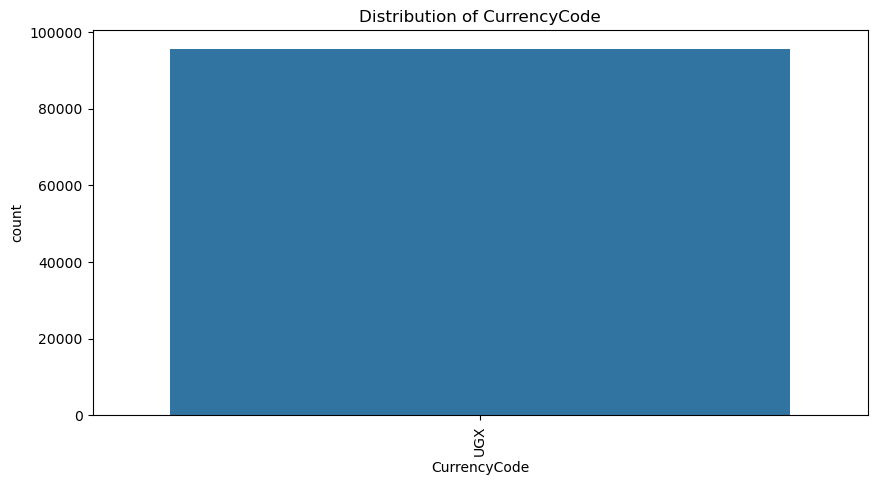

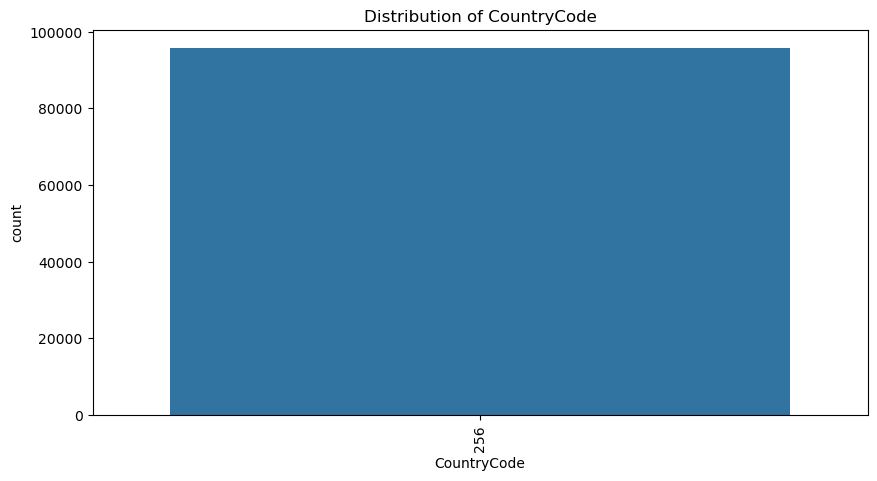

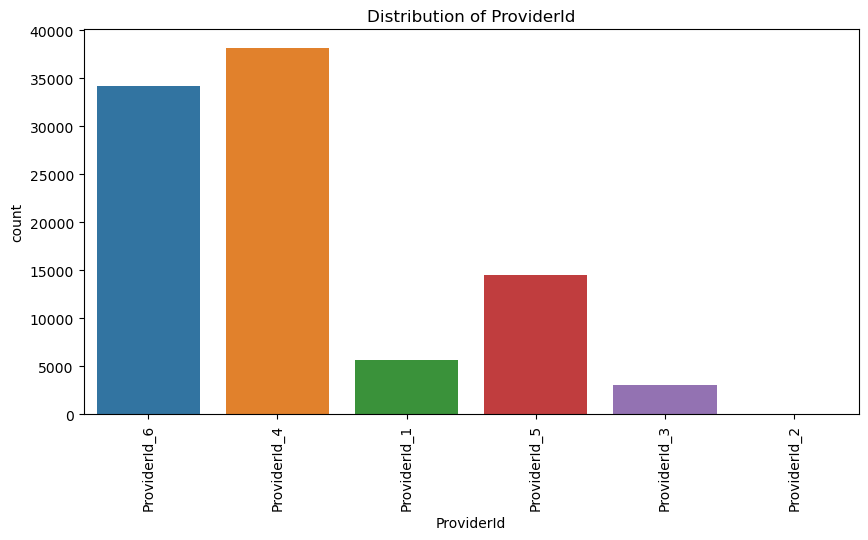

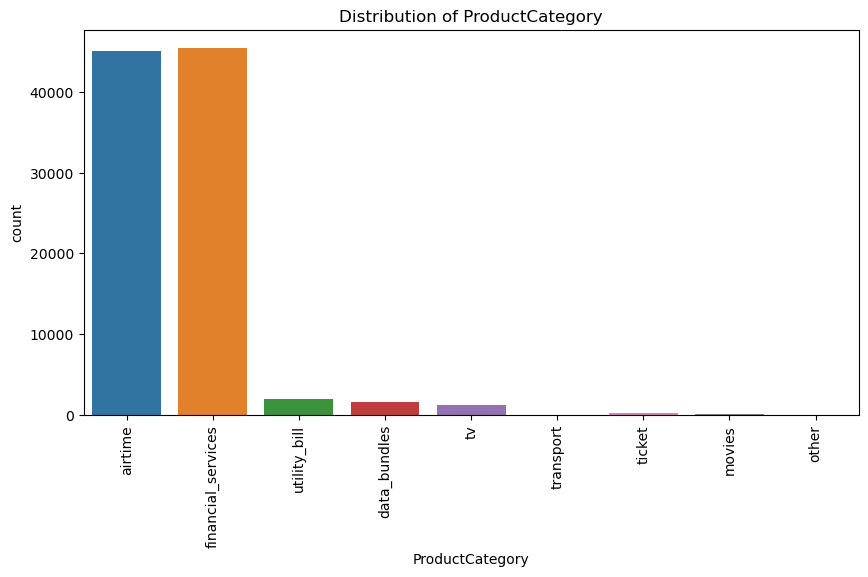

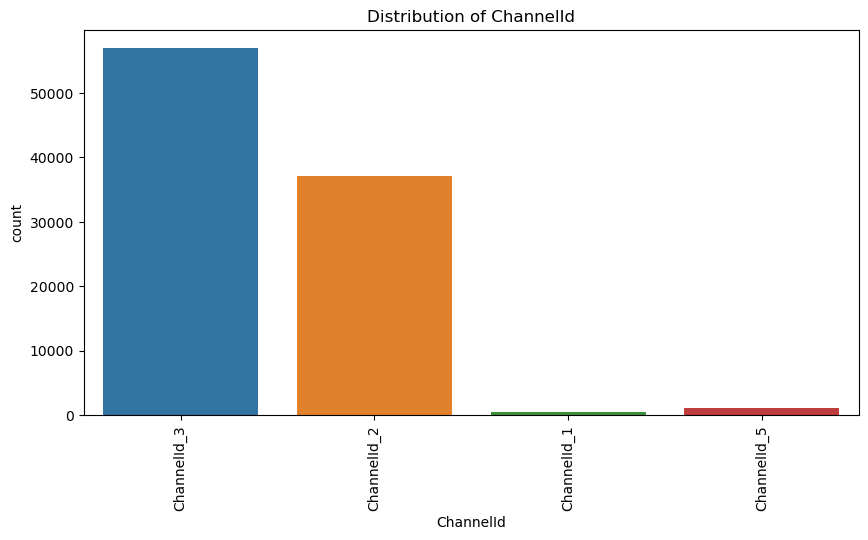

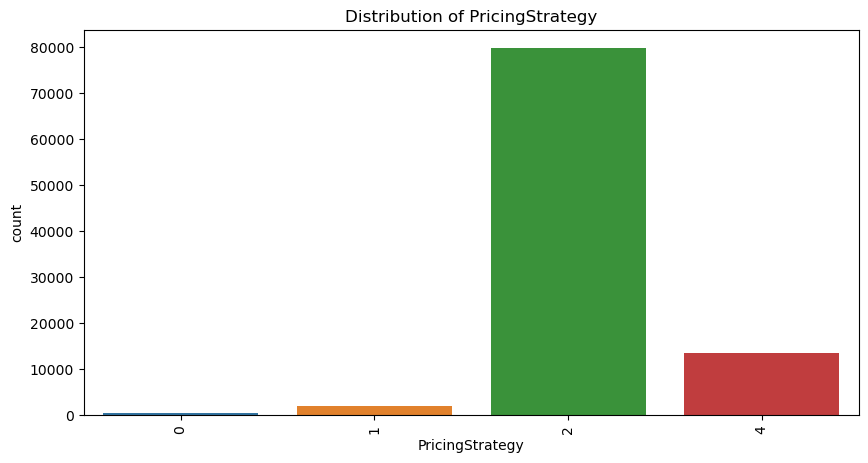

In [11]:

# List of categorical features to plot
categorical_features = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()




# Correlation Analysis

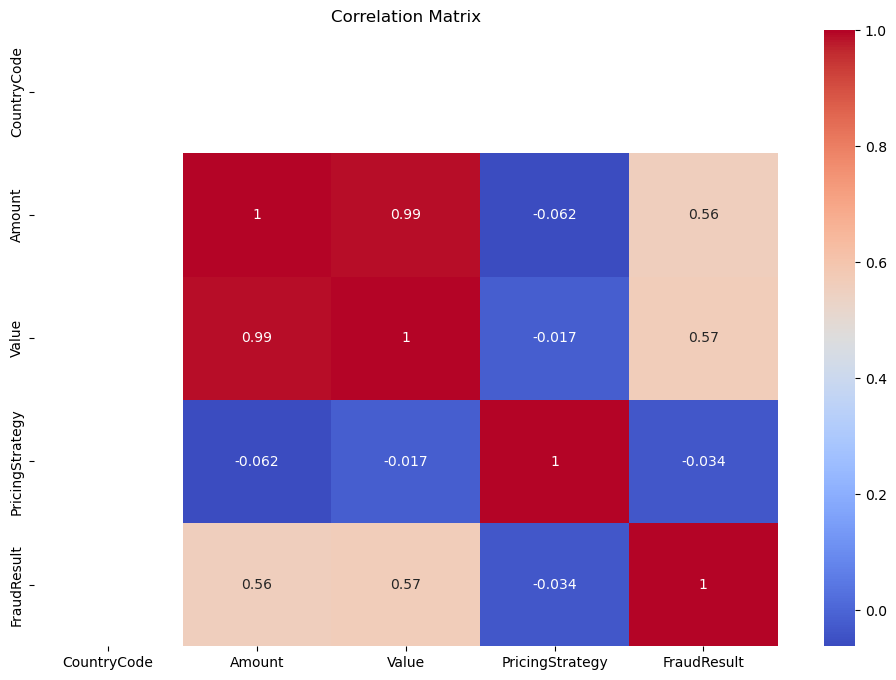

In [13]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Identifying Missing Values

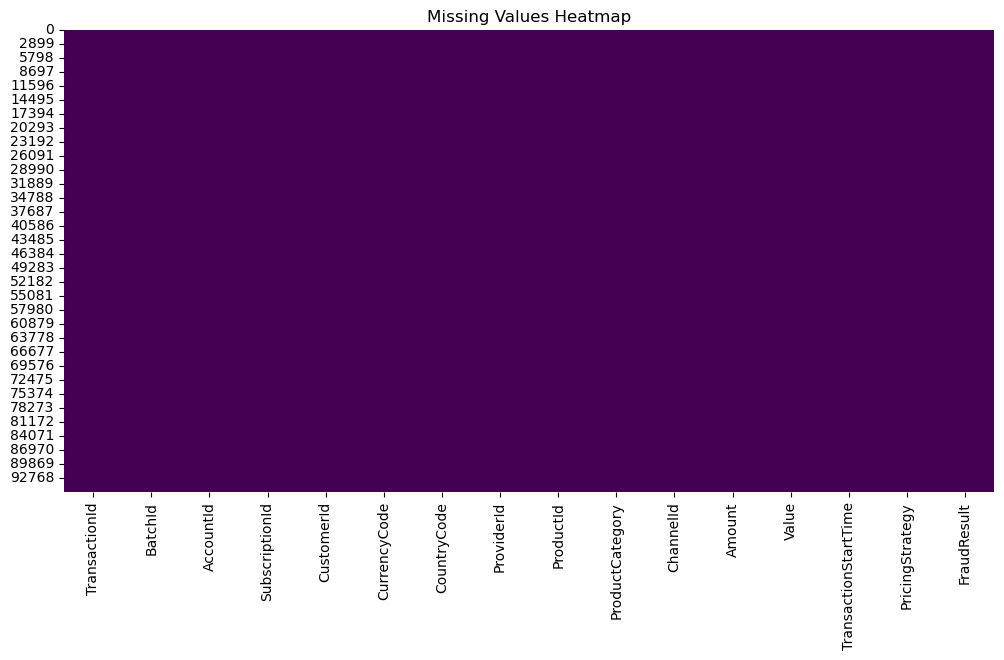

In [15]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_percentage

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# Outlier Detection

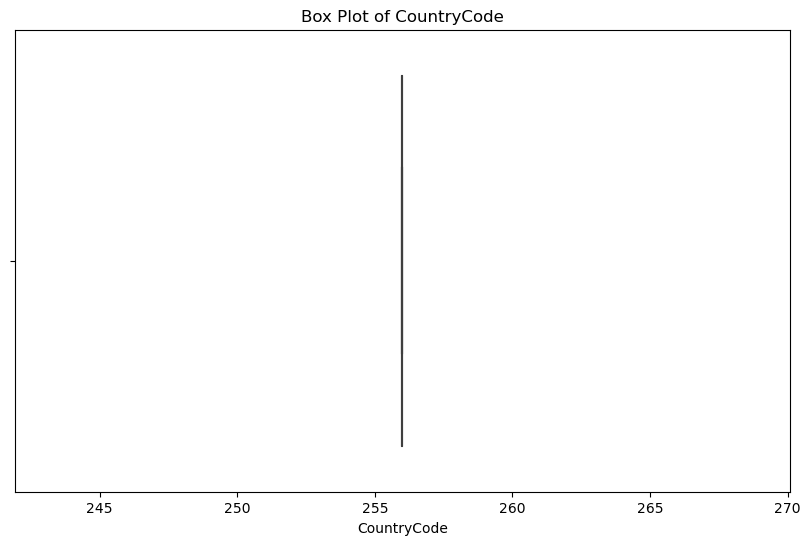

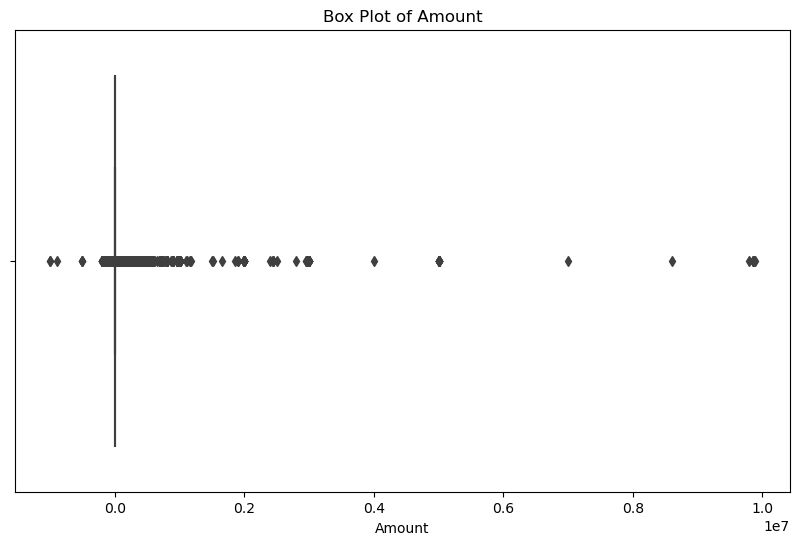

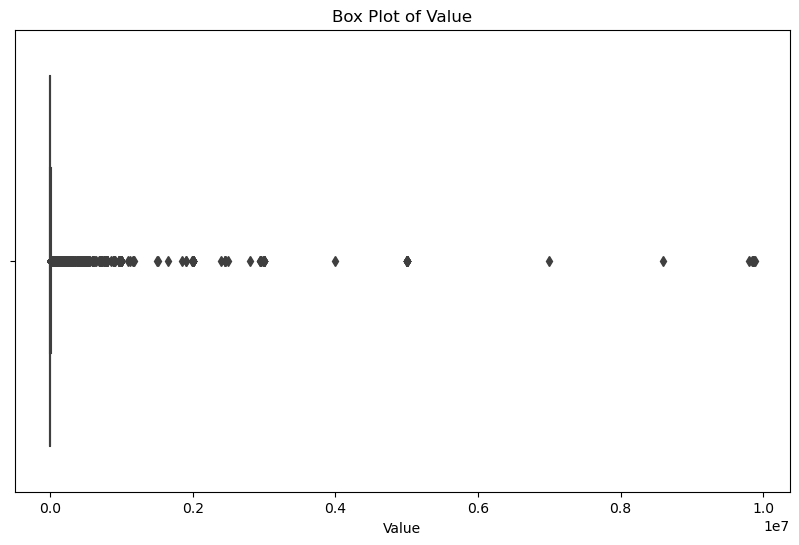

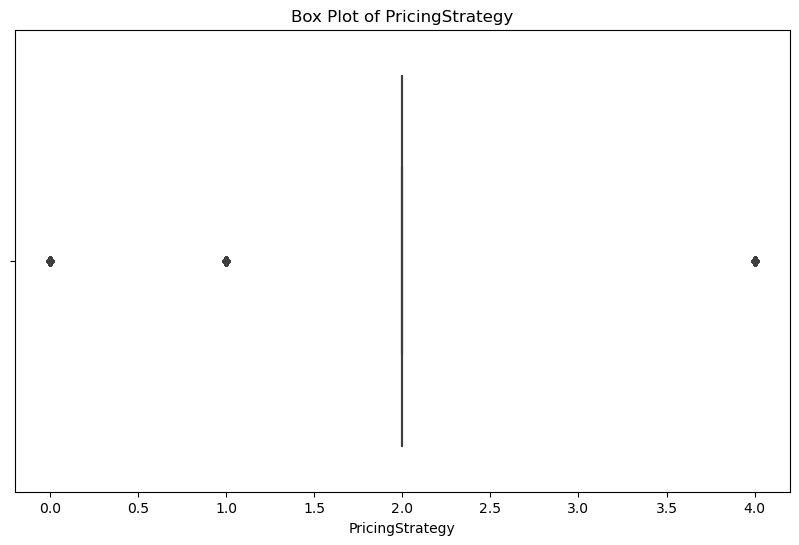

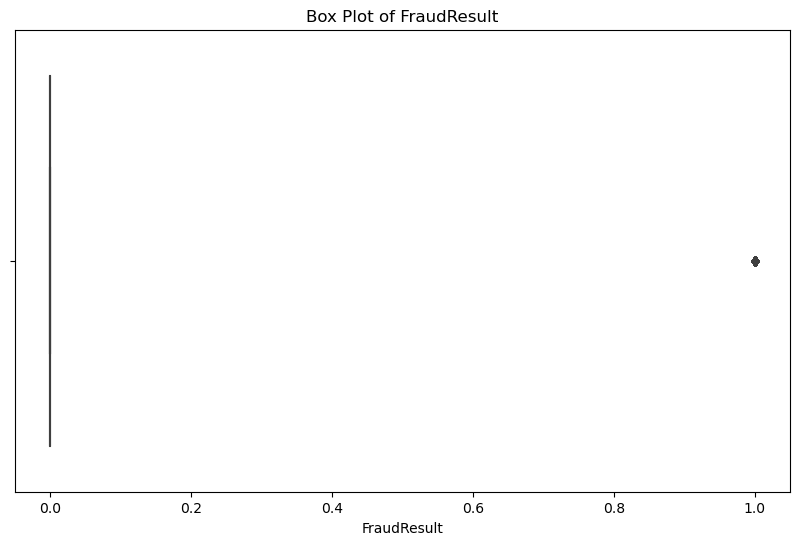

In [17]:
# Plot box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# Feature Engineering

In [19]:
# Create aggregate features
aggregate_features = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    StdTransactionAmount=('Amount', 'std')
).reset_index()

# Extract Features

In [21]:
# Convert transaction start time to datetime
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract time-based features
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year


# Encode Categorical Variables

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['CountryCode', 'CurrencyCode', 'ChannelId', 'ProviderId', 'ProductId', 'ProductCategory', 'PricingStrategy']

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded_features = pd.DataFrame(one_hot_encoder.fit_transform(data[categorical_features]),
                                        columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Combine with the main dataframe
data = pd.concat([data, one_hot_encoded_features], axis=1)

# Repeat for other categorical features as needed


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Handle Missing Values

In [25]:
from sklearn.impute import SimpleImputer

# Imputation for numerical features
imputer = SimpleImputer(strategy='mean')
data['Amount'] = imputer.fit_transform(data[['Amount']])
# Repeat for other numerical features as needed

# Drop rows with missing values in categorical features
data.dropna(subset=categorical_features, inplace=True)


# Normalize/Standardize Numerical Features

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_features = ['Amount', 'Value']
# Normalization
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Standardization
standardizer = StandardScaler()
data[numerical_features] = standardizer.fit_transform(data[numerical_features])


# Integrate Feature Engineering into a Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# Merge aggregate data with the original data
data = pd.merge(data, aggregate_features, on='CustomerId', how='left')

# Define preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the preprocessing pipeline to the data
processed_data = preprocessor.fit_transform(data)

# Ensure the processed data includes the necessary features for model training
X = processed_data
y = data['FraudResult']

# Check processed data
print(X.shape)
print(y.shape)


(95662, 50)
(95662,)


# Constructing a Default Estimator (Proxy) using RFMS Formalism

# Calculate RFMS Components

In [35]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Calculate Recency (days since last transaction)
data['Recency'] = (data['TransactionStartTime'].max() - data['TransactionStartTime']).dt.days

# Calculate Frequency (number of transactions per customer)
frequency = data.groupby('CustomerId')['TransactionId'].count().reset_index()
frequency.columns = ['CustomerId', 'Frequency']

# Calculate Monetary (total transaction amount per customer)
monetary = data.groupby('CustomerId')['Amount'].sum().reset_index()
monetary.columns = ['CustomerId', 'Monetary']

# Calculate Stability (standard deviation of transaction amounts per customer)
stability = data.groupby('CustomerId')['Amount'].std().reset_index()
stability.columns = ['CustomerId', 'Stability']

# Merge RFMS components
rfms = data[['CustomerId']].drop_duplicates()
rfms = rfms.merge(frequency, on='CustomerId')
rfms = rfms.merge(monetary, on='CustomerId')
rfms = rfms.merge(stability, on='CustomerId')
rfms = rfms.merge(data[['CustomerId', 'Recency']].drop_duplicates(), on='CustomerId')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


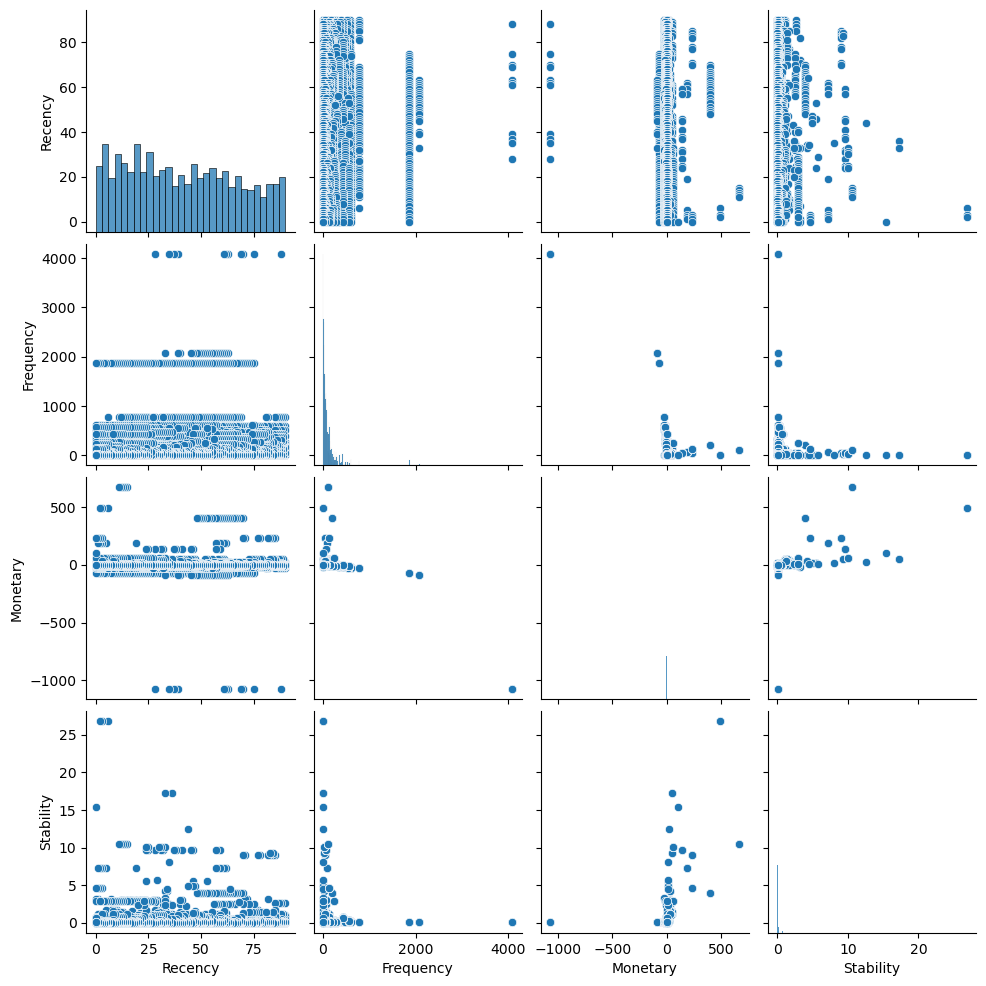

In [38]:
# Plot RFMS components
sns.pairplot(rfms, vars=['Recency', 'Frequency', 'Monetary', 'Stability'])
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
rfms_imputed = pd.DataFrame(imputer.fit_transform(rfms[['Recency', 'Frequency', 'Monetary', 'Stability']]),
                            columns=['Recency', 'Frequency', 'Monetary', 'Stability'])
# Normalize RFMS components
scaler = StandardScaler()
rfms_scaled = scaler.fit_transform(rfms_imputed[['Recency', 'Frequency', 'Monetary', 'Stability']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
rfms_imputed['Cluster'] = kmeans.fit_predict(rfms_scaled)

# Map clusters to Good/Bad labels
rfms_imputed['Label'] = rfms_imputed['Cluster'].map({0: 'Good', 1: 'Bad'})  # Adjust mapping based on your analysis


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import DescrStatsW

# Define WoE and IV function
def calculate_woe_iv(data, target, bins=10):
    df = data.copy()
    df['bin'] = pd.qcut(df[target], bins, duplicates='drop')
    woe_iv = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
    woe_iv.columns = ['bin', 'total', 'bad']
    woe_iv['good'] = woe_iv['total'] - woe_iv['bad']
    woe_iv['bad_rate'] = woe_iv['bad'] / woe_iv['total']
    woe_iv['good_rate'] = woe_iv['good'] / woe_iv['total']
    woe_iv['woe'] = np.log(woe_iv['bad_rate'] / woe_iv['good_rate'])
    woe_iv['iv'] = (woe_iv['bad_rate'] - woe_iv['good_rate']) * woe_iv['woe']
    return woe_iv

# Calculate WoE and IV for RFMS components
woe_recency = calculate_woe_iv(rfms_imputed, 'Recency')
woe_frequency = calculate_woe_iv(rfms_imputed, 'Frequency')
woe_monetary = calculate_woe_iv(rfms_imputed, 'Monetary')
woe_stability = calculate_woe_iv(rfms_imputed, 'Stability')

# Display WoE and IV values
print(woe_recency)
print(woe_frequency)
print(woe_monetary)
print(woe_stability)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


             bin  total       bad      good   bad_rate  good_rate  woe  iv
0  (-0.001, 7.0]   2390    8189.0   -5799.0   3.426360  -2.426360  NaN NaN
1    (7.0, 14.0]   2106   23295.0  -21189.0  11.061254 -10.061254  NaN NaN
2   (14.0, 22.0]   2397   44366.0  -41969.0  18.508970 -17.508970  NaN NaN
3   (22.0, 30.0]   2163   56931.0  -54768.0  26.320388 -25.320388  NaN NaN
4   (30.0, 39.0]   2231   77534.0  -75303.0  34.753026 -33.753026  NaN NaN
5   (39.0, 48.0]   2140   94661.0  -92521.0  44.234112 -43.234112  NaN NaN
6   (48.0, 57.0]   2220  117928.0 -115708.0  53.120721 -52.120721  NaN NaN
7   (57.0, 67.0]   2261  140937.0 -138676.0  62.333923 -61.333923  NaN NaN
8   (67.0, 78.0]   2052  149629.0 -147577.0  72.918616 -71.918616  NaN NaN
9   (78.0, 90.0]   2193  185174.0 -182981.0  84.438668 -83.438668  NaN NaN
               bin  total       bad      good    bad_rate   good_rate  woe  iv
0     (0.999, 6.0]   2380    7605.0   -5225.0    3.195378   -2.195378  NaN NaN
1      (6.0, 14.0

# Modeling 

In [53]:
# Inspect the columns of rfms_imputed
print(rfms_imputed.columns)

# Adjust the column names based on the actual DataFrame column names
# For example, if the actual column names are 'CustomerId', 'Cluster', and 'Label', use them instead
# Update the following lines with the correct column names after inspecting the DataFrame

# Assuming the correct column names are 'CustomerId', 'Cluster', and 'Label'
X = rfms_imputed.drop(columns=[ 'Cluster', 'Label'])
y = rfms_imputed['Label'].map({'Good': 0, 'Bad': 1})  # Encode labels as 0 and 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model training and evaluation process

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Initialize models
logreg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logreg.fit(X_train, y_train)

# Train Random Forest
random_forest.fit(X_train, y_train)

# Hyperparameter tuning for Logistic Regression
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc')
logreg_grid.fit(X_train, y_train)

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(random_forest, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

# Best models after hyperparameter tuning
best_logreg = logreg_grid.best_estimator_
best_random_forest = rf_grid.best_estimator_

# Predict on the test set
logreg_pred = best_logreg.predict(X_test)
rf_pred = best_random_forest.predict(X_test)

# Predict probabilities for ROC-AUC
logreg_pred_proba = best_logreg.predict_proba(X_test)[:, 1]
rf_pred_proba = best_random_forest.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC-AUC': roc_auc_score
}

# Logistic Regression metrics
logreg_metrics = {metric: metrics[metric](y_test, logreg_pred) for metric in metrics}
logreg_metrics['ROC-AUC'] = roc_auc_score(y_test, logreg_pred_proba)

# Random Forest metrics
rf_metrics = {metric: metrics[metric](y_test, rf_pred) for metric in metrics}
rf_metrics['ROC-AUC'] = roc_auc_score(y_test, rf_pred_proba)

# Display the results
print("Logistic Regression Metrics:")
for metric, value in logreg_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nRandom Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")


Index(['Recency', 'Frequency', 'Monetary', 'Stability', 'Cluster', 'Label'], dtype='object')
Logistic Regression Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000

Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
